In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import TruncatedSVD,PCA

In [ ]:
data=pd.read_csv('data.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
X=data.drop(['id','Unnamed: 32','diagnosis'],axis=1)
Y=data['diagnosis']


In [ ]:
lbl=LabelEncoder()
y_encoded=lbl.fit_transform(Y)
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [ ]:
X.shape

(569, 30)

In [ ]:
#n_components=X.shape[1]-1
n_components=min(X.shape)-1
n_components

29

In [ ]:
svd=TruncatedSVD(n_components=n_components)
data_svd=svd.fit_transform(X_scaled)

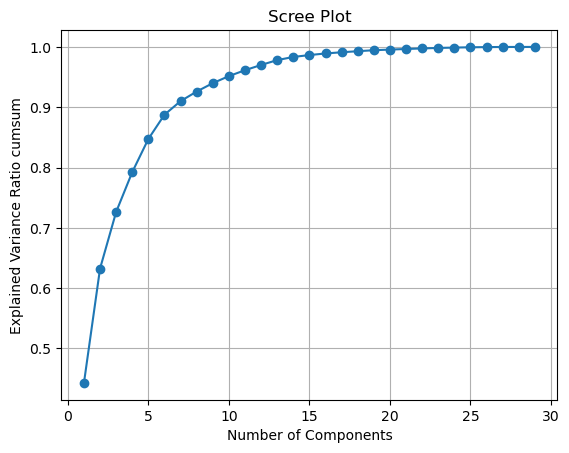

In [ ]:
import matplotlib.pyplot as plt
explained_variance=svd.explained_variance_ratio_.cumsum()
components=np.arange(n_components)+1
plt.plot(components,explained_variance,marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio cumsum')
plt.title('Scree Plot')
plt.grid(True)
plt.show()   

In [ ]:
cumulative_explained_variance=svd.explained_variance_ratio_.cumsum()
n_components=np.argmax(cumulative_explained_variance>=0.95)+1
n_components

10

In [ ]:
features=X.columns
loadings=svd.components_ #each components as an array
svd1=pd.Series(loadings[0],index=features)
print('components 1',svd1)
svd2=pd.Series(loadings[1],index=features)
print('Components 2',svd2)
print(loadings.shape)

components 1 radius_mean                0.218902
texture_mean               0.103725
perimeter_mean             0.227537
area_mean                  0.220995
smoothness_mean            0.142590
compactness_mean           0.239285
concavity_mean             0.258400
concave points_mean        0.260854
symmetry_mean              0.138167
fractal_dimension_mean     0.064363
radius_se                  0.205979
texture_se                 0.017428
perimeter_se               0.211326
area_se                    0.202870
smoothness_se              0.014531
compactness_se             0.170393
concavity_se               0.153590
concave points_se          0.183417
symmetry_se                0.042498
fractal_dimension_se       0.102568
radius_worst               0.227997
texture_worst              0.104469
perimeter_worst            0.236640
area_worst                 0.224871
smoothness_worst           0.127953
compactness_worst          0.210096
concavity_worst            0.228768
concave points_

In [ ]:
svd_model=TruncatedSVD(n_components=10)
data_final=svd_model.fit_transform(X_scaled)
svddf=pd.DataFrame(data_final,columns=['SVD1','SVD2','SVD3','SVD4','SVD5','SVD6'
                                      ,'SVD7','SVD8','SVD9','SVD10'])
final_df=pd.concat([svddf,Y],axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SVD1       569 non-null    float64
 1   SVD2       569 non-null    float64
 2   SVD3       569 non-null    float64
 3   SVD4       569 non-null    float64
 4   SVD5       569 non-null    float64
 5   SVD6       569 non-null    float64
 6   SVD7       569 non-null    float64
 7   SVD8       569 non-null    float64
 8   SVD9       569 non-null    float64
 9   SVD10      569 non-null    float64
 10  diagnosis  569 non-null    object 
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X=final_df.drop('diagnosis',axis=1)
Y=final_df['diagnosis']
lbl=LabelEncoder()
y_encode=lbl.fit_transform(Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,y_encoded,test_size=0.2,
                                               random_state=42)
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train,Y_train)
y_pred=lr_model.predict(X_test)
print('Model Accuracy is:',accuracy_score(Y_test,y_pred))


Model Accuracy is: 0.9824561403508771


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
data=pd.read_csv('ANSUR_II_FEMALE.csv')
#data.info()
data.drop('SNO',axis=1,inplace=True)
#take only the numerical columns
data_numeric=data.select_dtypes(include=['int64','float64']).dropna()
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   abdominalextensiondepthsitting  1986 non-null   int64  
 1   acromialheight                  1986 non-null   int64  
 2   acromionradialelength           1986 non-null   int64  
 3   anklecircumference              1986 non-null   int64  
 4   axillaheight                    1986 non-null   int64  
 5   balloffootcircumference         1986 non-null   int64  
 6   balloffootlength                1986 non-null   int64  
 7   biacromialbreadth               1986 non-null   int64  
 8   bicepscircumferenceflexed       1986 non-null   int64  
 9   bicristalbreadth                1986 non-null   int64  
 10  bideltoidbreadth                1986 non-null   int64  
 11  bimalleolarbreadth              1986 non-null   int64  
 12  bitragionchinarc                19

small perplexity value it is used to capture - local structure of data
Large perplexity value it is used to capture - global and local structue
Rule is by default perplexity value is 30
perlexity < 3*sqrt(samples)
but best technique is to find the kl divergence
The point where the kl divergence is minimum is the perplexity value
[5,10,20,30,50,60]
n_components=2
2D space or 3D space

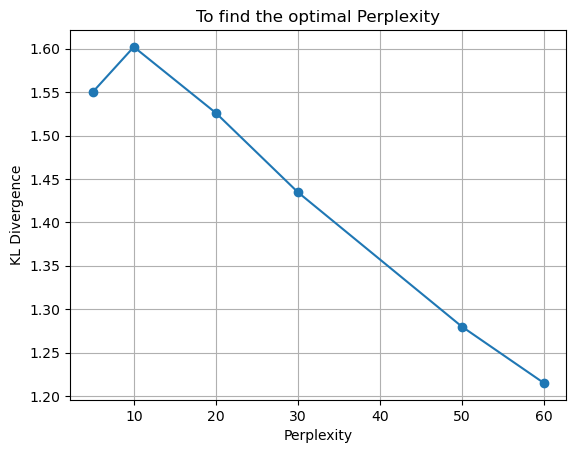

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
perplex=[5,10,20,30,50,60]
kl_divergence=[]
for p in perplex:
    tsne=TSNE(n_components=2,perplexity=p,random_state=42)
    tsne.fit_transform(data_numeric)
    kl_divergence.append(tsne.kl_divergence_)
plt.plot(perplex,kl_divergence,marker='o')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.title('To find the optimal Perplexity')
plt.grid(True)
plt.show()


Learning Rate - optimization parameter
very low - get stuck in lical minima
very high - unstable updates
LR- default-200
small ds - 50 -100
LDS - 500 -1000

In [ ]:
#The divergence is less at 50 first huge decrease happens at this point
tsne=TSNE(n_components=2,perplexity=50,learning_rate=100,n_iter=1000)
sc=StandardScaler()
X_scaled=sc.fit_transform(data_numeric)
data_final=tsne.fit_transform(X_scaled)


array([[ 11.644121 ,   5.3839793],
       [ -2.8626359, -22.094141 ],
       [-18.57636  , -17.733183 ],
       ...,
       [-21.329374 ,   4.504323 ],
       [ 17.279799 ,   1.16394  ],
       [ -1.896233 ,  -3.7889645]], dtype=float32)

In [ ]:
component1=data_final[:,0]
component2=data_final[:,1]

In [ ]:
print(component1)

[ 11.644121   -2.8626359 -18.57636   ... -21.329374   17.279799
  -1.896233 ]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Branch                          1986 non-null   object 
 1   Component                       1986 non-null   object 
 2   Gender                          1986 non-null   object 
 3   abdominalextensiondepthsitting  1986 non-null   int64  
 4   acromialheight                  1986 non-null   int64  
 5   acromionradialelength           1986 non-null   int64  
 6   anklecircumference              1986 non-null   int64  
 7   axillaheight                    1986 non-null   int64  
 8   balloffootcircumference         1986 non-null   int64  
 9   balloffootlength                1986 non-null   int64  
 10  biacromialbreadth               1986 non-null   int64  
 11  bicepscircumferenceflexed       1986 non-null   int64  
 12  bicristalbreadth                19

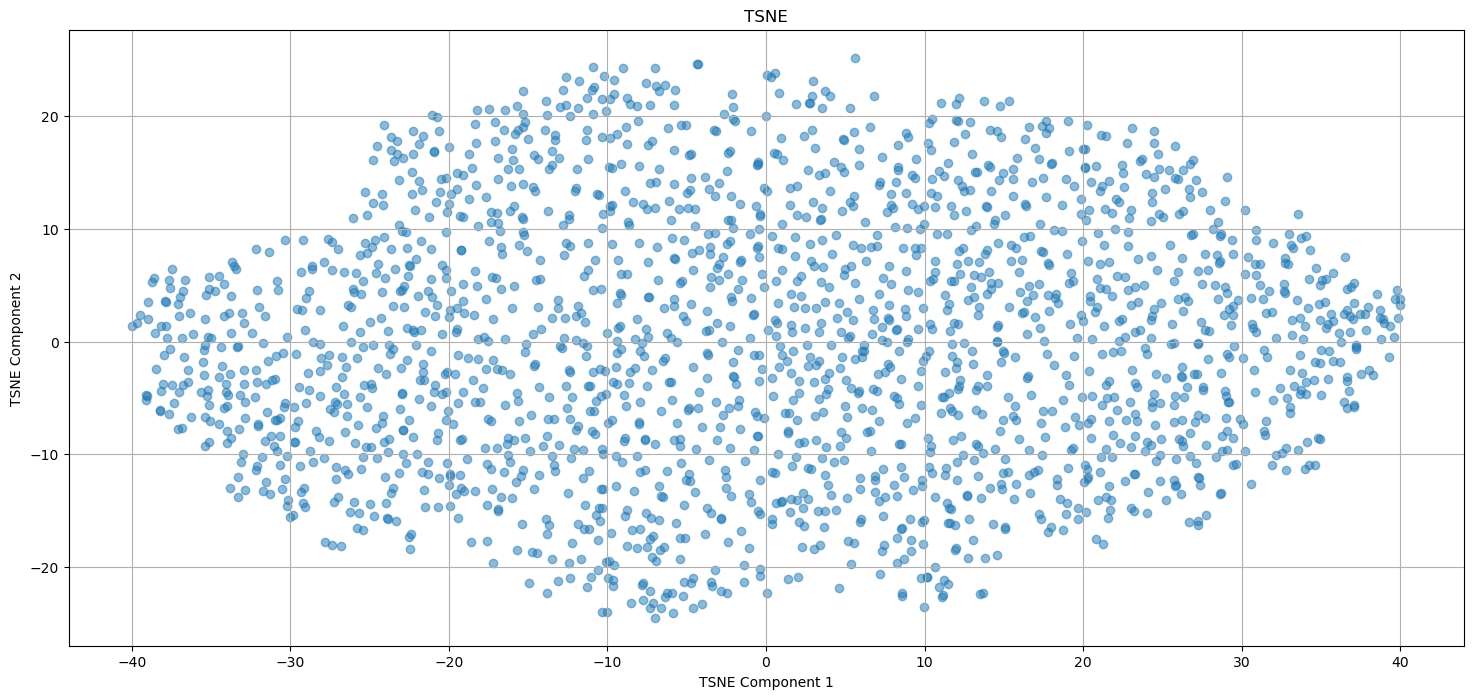

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,8))
plt.scatter(data_final[:,0],data_final[:,1],alpha=0.5)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE')
plt.grid(True)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TSNE Comp1  1986 non-null   float32
 1   TSNE Comp2  1986 non-null   float32
 2   Height      1986 non-null   object 
dtypes: float32(2), object(1)
memory usage: 31.2+ KB


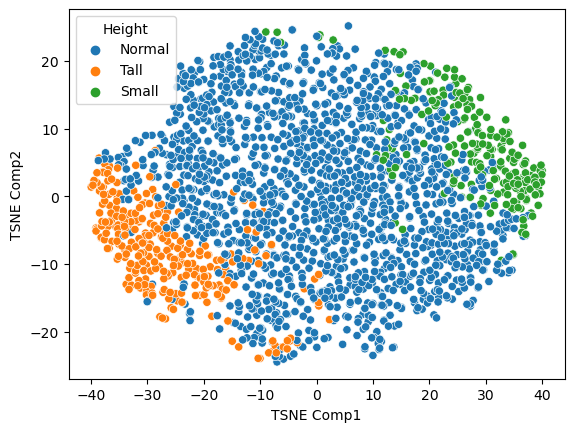

In [ ]:
data_df=pd.DataFrame()
data_df['TSNE Comp1']=data_final[:,0]
data_df['TSNE Comp2']=data_final[:,1]
data_df['Height']=data['Height_class']
data_df.info()
sns.scatterplot(x='TSNE Comp1',y='TSNE Comp2',data=data_df,hue='Height')
plt.show()

In [ ]:
X=data_df.drop('Height',axis=1)
Y=data_df['Height']
lbl=LabelEncoder()
y_encode=lbl.fit_transform(Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,y_encode,test_size=0.2,
                                               random_state=42)
lr_model=LogisticRegression()
lr_model.fit(X_train,Y_train)
y_pred=lr_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))


0.9045226130653267
